In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import Symbol, Eq, solve
import matplotlib.patches as patches

In [2]:
#i have changed so much i just want github to work
width = 18
plate_separation = 6
plate_num = 6
edge_wall1 = 0
edge_wall2 = plate_separation*(plate_num)

x_co = random.randint(-width/2-2,width/2+2)
c_co = random.randint(-width/2-2,width/2+2)
x_array = np.linspace(-width/2-2,width/2+2, 1000)

y_array = x_co*x_array+c_co

Hit at 0.5454545454545454, 0
Hit at 1.0909090909090908, 6
Hit at 1.6363636363636365, 12
Hit at 2.1818181818181817, 18
Hit at 2.727272727272727, 24
Hit at 3.272727272727273, 30


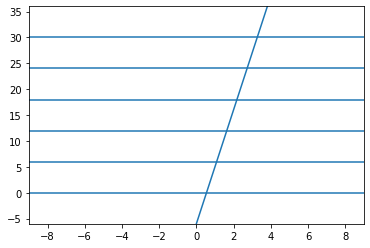

In [15]:
for i in range(plate_num):
    plate_location = plate_separation*i
    plt.axhline(plate_location)
    if x_co == 0:
        print('No Interception')
        break
    else:
        x_value = (plate_location - c_co)/x_co
        if x_value > -width/2 and x_value<width/2:
            print(f'Hit at {x_value}, {plate_location}')
        else:
            continue
    
plt.plot(x_array, y_array)
plt.ylim(-plate_separation, edge_wall2)
plt.xlim(-width/2,width/2)
plt.show()

Hit on pixel at 0.5454545454545454 and 0.6363636363636364
Hit on pixel at 2.1818181818181817 and 2.272727272727273
Hit on pixel at 2.727272727272727 and 2.8181818181818183


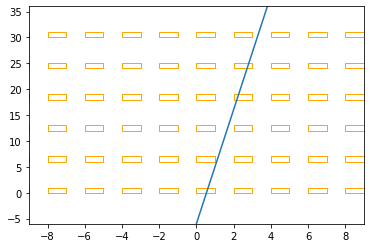

In [16]:
pixel = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8]
fig, ax = plt.subplots()

for i in range(plate_num):
    plate_location = plate_separation*i
    x_value_l = (plate_location - c_co)/x_co
    x_value_u = (plate_location+1 - c_co)/x_co
    for p in pixel:
        square = patches.Rectangle((p, plate_location), 1, 1, edgecolor='orange', facecolor='none')
        ax.add_patch(square)
        if x_value_l > p and x_value_l < p+1:
            if x_value_u > p and x_value_u < p+1:
                print(f'Hit on pixel at {x_value_l} and {x_value_u}')
            else:
                print(f'Hit on pixel at {x_value_l}')
        
        elif x_value_u > p and x_value_u < p+1:
            print(f'Hit on pixel at {x_value_u}')
            
        else:
            continue

plt.plot(x_array, y_array)
plt.ylim(-plate_separation, edge_wall2)
plt.xlim(-width/2,width/2)
plt.show()

Hit on pixel at (horizontal) (0.5454545454545454, 0) and (0.6363636363636364, 1)
Hit on pixel at (horizontal) (1.0909090909090908, 6) and (1.1818181818181819, 7)
Hit on pixel at (horizontal) (2.727272727272727, 24) and (2.8181818181818183, 25)
Hit on pixel at (horizontal) (3.272727272727273, 30) and (3.3636363636363638, 31)


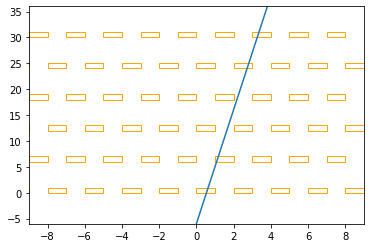

In [17]:
pixel = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8]
fig, ax = plt.subplots()

for i in range(plate_num):
    plate_location = plate_separation*i
    x_value_l = (plate_location - c_co)/x_co
    x_value_u = (plate_location+1 - c_co)/x_co
    
    for p in pixel:
        if i%2 == 0:
            p_l = p
            p_u = p+1
            
        else:
            p_l = p+1
            p_u = p+2
            
        y_value_l = (x_co*(p_l)) +c_co
        y_value_r = (x_co*(p_u)) +c_co

        square = patches.Rectangle((p_l, plate_location), 1, 1, edgecolor='orange', facecolor='none')
        ax.add_patch(square)
        if x_value_l > p_l and x_value_l < p_u:
            if x_value_u > p_l and x_value_u < p_u:
                print(f'Hit on pixel at (horizontal) ({x_value_l}, {plate_location}) and ({x_value_u}, {plate_location+1})')
            else:
                print(f'Hit on pixel at (horizontal lower) ({x_value_l}, {plate_location})')

        elif x_value_u > p_l and x_value_u < p_u:
            print(f'Hit on pixel at (horizontal upper) ({x_value_u}, {plate_location+1})')

        else:
            continue
            
        if y_value_l >= plate_location and y_value_l <= plate_location+1:
            if y_value_r >= plate_location and y_value_r <= plate_location+1:
                print(f'Hit on pixel at (vertical) ({p_l}, {y_value_l}) and ({p_u}, {y_value_r})')
            else:
                print(f'Hit on pixel at (vertical left) ({p_l}, {y_value_l})')
            
        elif y_value_r >= plate_location and y_value_r <= plate_location+1:
            print(f'Hit on pixel at (vertical right) ({p_u}, {y_value_r})')
        
        else:
            continue
            
            
plt.plot(x_array, y_array)
plt.ylim(-plate_separation, edge_wall2)
plt.xlim(-width/2,width/2)
plt.show()

Hit on pixel at (horizontal) (0.5454545454545454, 0) and (0.6363636363636364, 1)


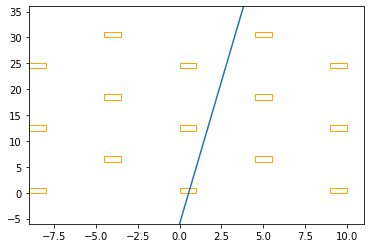

In [20]:
pixel_size = 1
pixel = np.linspace(-width/2, width/2, 3)
diff = pixel[1] - pixel[0]
fig, ax = plt.subplots()

for i in range(plate_num):
    plate_location = plate_separation*i
    x_value_l = (plate_location - c_co)/x_co
    x_value_u = (plate_location+1 - c_co)/x_co
    
    for p in pixel:
        if i%2 == 0:
            p_l = p
            p_u = p+pixel_size
            
        else:
            p_l = p+(diff/2)
            p_u = p+(diff/2)+pixel_size
            
        y_value_l = (x_co*(p_l)) +c_co
        y_value_r = (x_co*(p_u)) +c_co

        square = patches.Rectangle((p_l, plate_location), pixel_size, pixel_size, edgecolor='orange', facecolor='none')
        ax.add_patch(square)
        if x_value_l > p_l and x_value_l < p_u:
            if x_value_u > p_l and x_value_u < p_u:
                print(f'Hit on pixel at (horizontal) ({x_value_l}, {plate_location}) and ({x_value_u}, {plate_location+1})')
            else:
                print(f'Hit on pixel at (horizontal lower) ({x_value_l}, {plate_location})')

        elif x_value_u > p_l and x_value_u < p_u:
            print(f'Hit on pixel at (horizontal upper) ({x_value_u}, {plate_location+1})')

        else:
            continue
            
        if y_value_l >= plate_location and y_value_l <= plate_location+1:
            if y_value_r >= plate_location and y_value_r <= plate_location+1:
                print(f'Hit on pixel at (vertical) ({p_l}, {y_value_l}) and ({p_u}, {y_value_r})')
            else:
                print(f'Hit on pixel at (vertical left) ({p_l}, {y_value_l})')
            
        elif y_value_r >= plate_location and y_value_r <= plate_location+1:
            print(f'Hit on pixel at (vertical right) ({p_u}, {y_value_r})')
        
        else:
            continue
            
            
plt.plot(x_array, y_array)
plt.ylim(-plate_separation, edge_wall2)
plt.xlim(-width/2,width/2+2)
plt.show()

In [19]:
x_point = Symbol('x_point')
y_point = Symbol('y_point')

for i in range(plate_num):
    plate_location = plate_separation*i
    intersection = solve((Eq(y_point ,x_co*x_point+c_co), Eq(y_point, plate_location)),(x_point,y_point))
    if intersection == []:
        continue
    else:
        print(f'Hit {intersection}')

Hit {x_point: 6/11, y_point: 0}
Hit {x_point: 12/11, y_point: 6}
Hit {x_point: 18/11, y_point: 12}
Hit {x_point: 24/11, y_point: 18}
Hit {x_point: 30/11, y_point: 24}
Hit {x_point: 36/11, y_point: 30}


In [69]:
print(pixel)

[-10.  -5.   0.   5.  10.]
